In [1]:
import numpy as np
from retrieval_base.model.rotation_profile import SurfaceMap

In [10]:
import importlib
importlib.import_module('pt_profile', __name__)

<module 'pt_profile' from '/net/lem/data1/regt/retrieval_base/retrieval_base/model/pt_profile.py'>

In [1]:
from retrieval_base import utils

In [2]:
utils.load_pickle('/net/lem/data1/regt/retrieval_base/Luhman_16/retrieval_outputs/test/test_data/Chem_K2166_B.pkl')

ModuleNotFoundError: No module named 'retrieval_base.model.chemistry'; 'retrieval_base.model' is not a package

In [2]:
surface = SurfaceMap()

In [3]:
#surface.r_grid
surface.area_grid

array([0.78539816, 0.78539816, 0.78539816, ..., 0.0418879 , 0.0418879 ,
       0.0418879 ])

In [4]:
surface.unique_mu[-1]

0.052335956242943744

In [5]:
surface.mu_grid[-1]

0.052335956242943744

In [6]:
surface.mu_grid
tot = 0
for mu_i in surface.unique_mu:
    mask = (surface.mu_grid == mu_i)
    tot += mask.sum()

    print(mu_i, surface.area_grid[mask].sum())

0.9986295347545739 6.283185307179586
0.9876883405951377 6.283185307179586
0.9659258262890684 6.283185307179587
0.9335804264972016 6.283185307179584
0.8910065241883677 6.2831853071795845
0.838670567945424 6.283185307179586
0.7771459614569711 6.283185307179587
0.7071067811865477 6.283185307179585
0.6293203910498374 6.283185307179589
0.544639035015027 6.283185307179586
0.4539904997395466 6.283185307179588
0.3583679495453002 6.283185307179587
0.2588190451025208 6.283185307179586
0.1564344650402307 6.283185307179586
0.052335956242943744 6.283185307179586


In [7]:
import numpy as np
flux = np.ones((10,100))
wave = np.linspace(0,1,100)
flux[0,0] = np.nan

np.trapz(x=wave, y=flux, axis=-1)
#flux[0,0] = np.nan
#np.nansum(flux, axis=0)

array([nan,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [10]:
tot, len(surface.area_grid)

(1440, 1440)

In [6]:
np.sum(surface.area_grid)

3.1473419113342196

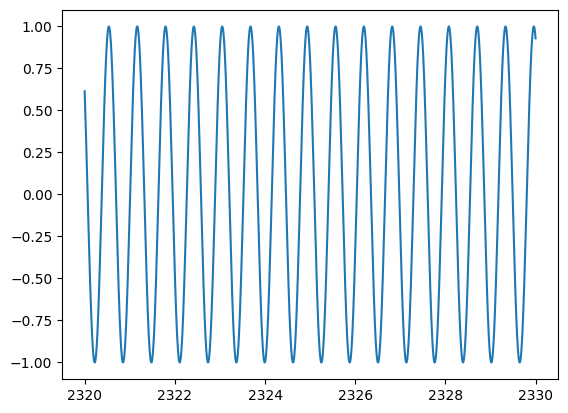

(150, 2048)


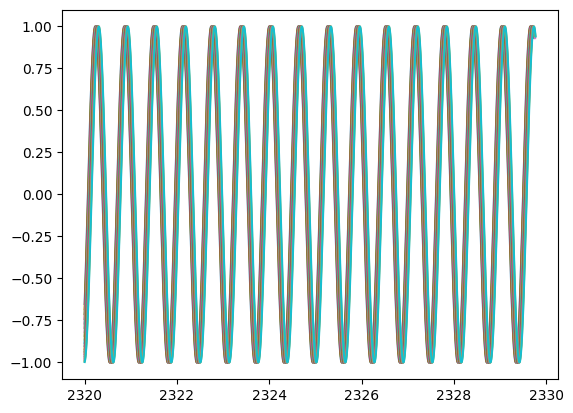

In [22]:
from scipy.interpolate import interp1d

wave = np.linspace(2320, 2330, 2048)
flux = np.sin(wave*10)

import matplotlib.pyplot as plt
plt.plot(wave, flux)
plt.show()
interp_func = interp1d(wave, flux, kind='linear', bounds_error=False, fill_value=np.nan)
#interp_func()
rv = np.linspace(-40, 40, 150)
wave_new = wave[None,:] * (1 - rv[:,None]/3e5)
flux_new = interp_func(wave_new)
print(flux_new.shape)

[plt.plot(wave, flux_new[i]) for i in range(20)]
plt.show()